In [1]:
'''
obsidian://open?vault=%E6%9E%84%E5%BB%BA%E4%BA%BA%E7%B1%BB%E5%AD%A6%E4%B9%A0%E7%B3%BB%E7%BB%9F&file=%E6%AF%8F%E6%97%A5%E9%A2%86%E6%82%9F%2F2022%E5%85%AD%E6%9C%88%2F2022%E5%B9%B46%E6%9C%8823%E6%97%A5%2Fepoch%20%E6%8A%BD%E6%A0%B7%E5%87%BD%E6%95%B0

'''

import numpy as np
import os.path as op
from pandas import read_csv
import mne
from mne.io import read_raw_fif
from mne.datasets import visual_92_categories
from neurora.nps_cal import nps
from neurora.rdm_cal import eegRDM
from neurora.rdm_corr import rdm_correlation_spearman
from neurora.corr_cal_by_rdm import rdms_corr
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap


D:\ProgramData\Anaconda3\envs\RSA\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [21]:
num_sub = 0

T1_sub_ids = [
    'prex018','prex019'  ]

T2M_sub_ids = [
    'prex018M','prex019M' ]

T2S_sub_ids = [
    'prex018S','prex019S' ]
data_path = 'E:\Python LYW\RSA\spaced_learning\pre10\\analysis\data\\6epoch_clean\\'

list_epochs_T1S = list()
list_epochs_T2S = list()
list_epochs_T2M = list()

for sub_id in T1_sub_ids:
    fname = data_path + sub_id + '-epo.fif'
    epochs = mne.read_epochs(fname)
    list_epochs_T1S.append(epochs)

for sub_id in T2S_sub_ids:
    fname = data_path + sub_id + '-epo.fif'
    epochs = mne.read_epochs(fname)
    list_epochs_T2S.append(epochs)

for sub_id in T2M_sub_ids:
    fname = data_path + sub_id + '-epo.fif'
    epochs = mne.read_epochs(fname)
    list_epochs_T2M.append(epochs)

Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\6epoch_clean\prex018-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\6epoch_clean\prex019-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\6epoch_clean\prex018S-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
44 matching events found
No baseline correction applied
0 pro

In [33]:
#每种条件的epoch拼接
epochs_concatenate = mne.concatenate_epochs([list_epochs_T1S[0],list_epochs_T2M[0],list_epochs_T2S[0]])
print(epochs_concatenate)
#最小时间戳差异挑选
epochs_concatenate.equalize_event_counts(method='mintime')
print(epochs_concatenate)
#选择某个条件的epochs
epochs = epochs_concatenate['101']
print(epochs)

Not setting metadata
Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
<Epochs |  128 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~31.4 MB, data loaded,
 '101': 35
 '102': 49
 '103': 44>
Dropped 23 epochs: 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 119, 120, 121, 122, 123, 124, 125, 126, 127
<Epochs |  105 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~25.8 MB, data loaded,
 '101': 35
 '102': 35
 '103': 35>
<Epochs |  35 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~8.7 MB, data loaded,
 '101': 35>


In [29]:
epochs_Fp1 = epochs.pick_channels(['Fp2'])

    Using multitaper spectrum estimation with 7 DPSS windows


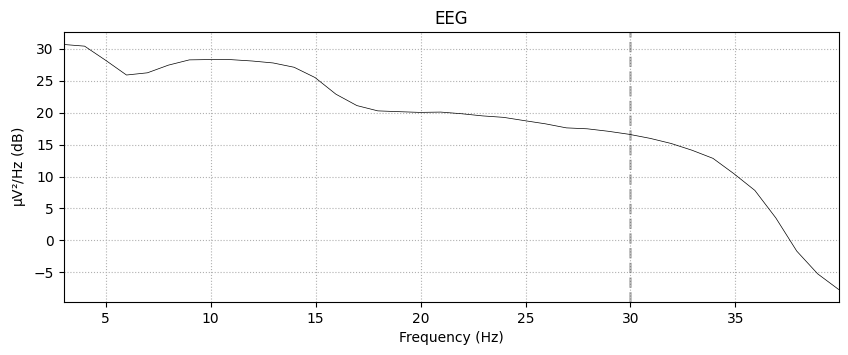

In [26]:
%matplotlib qt
epochs_Fp1.plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False)

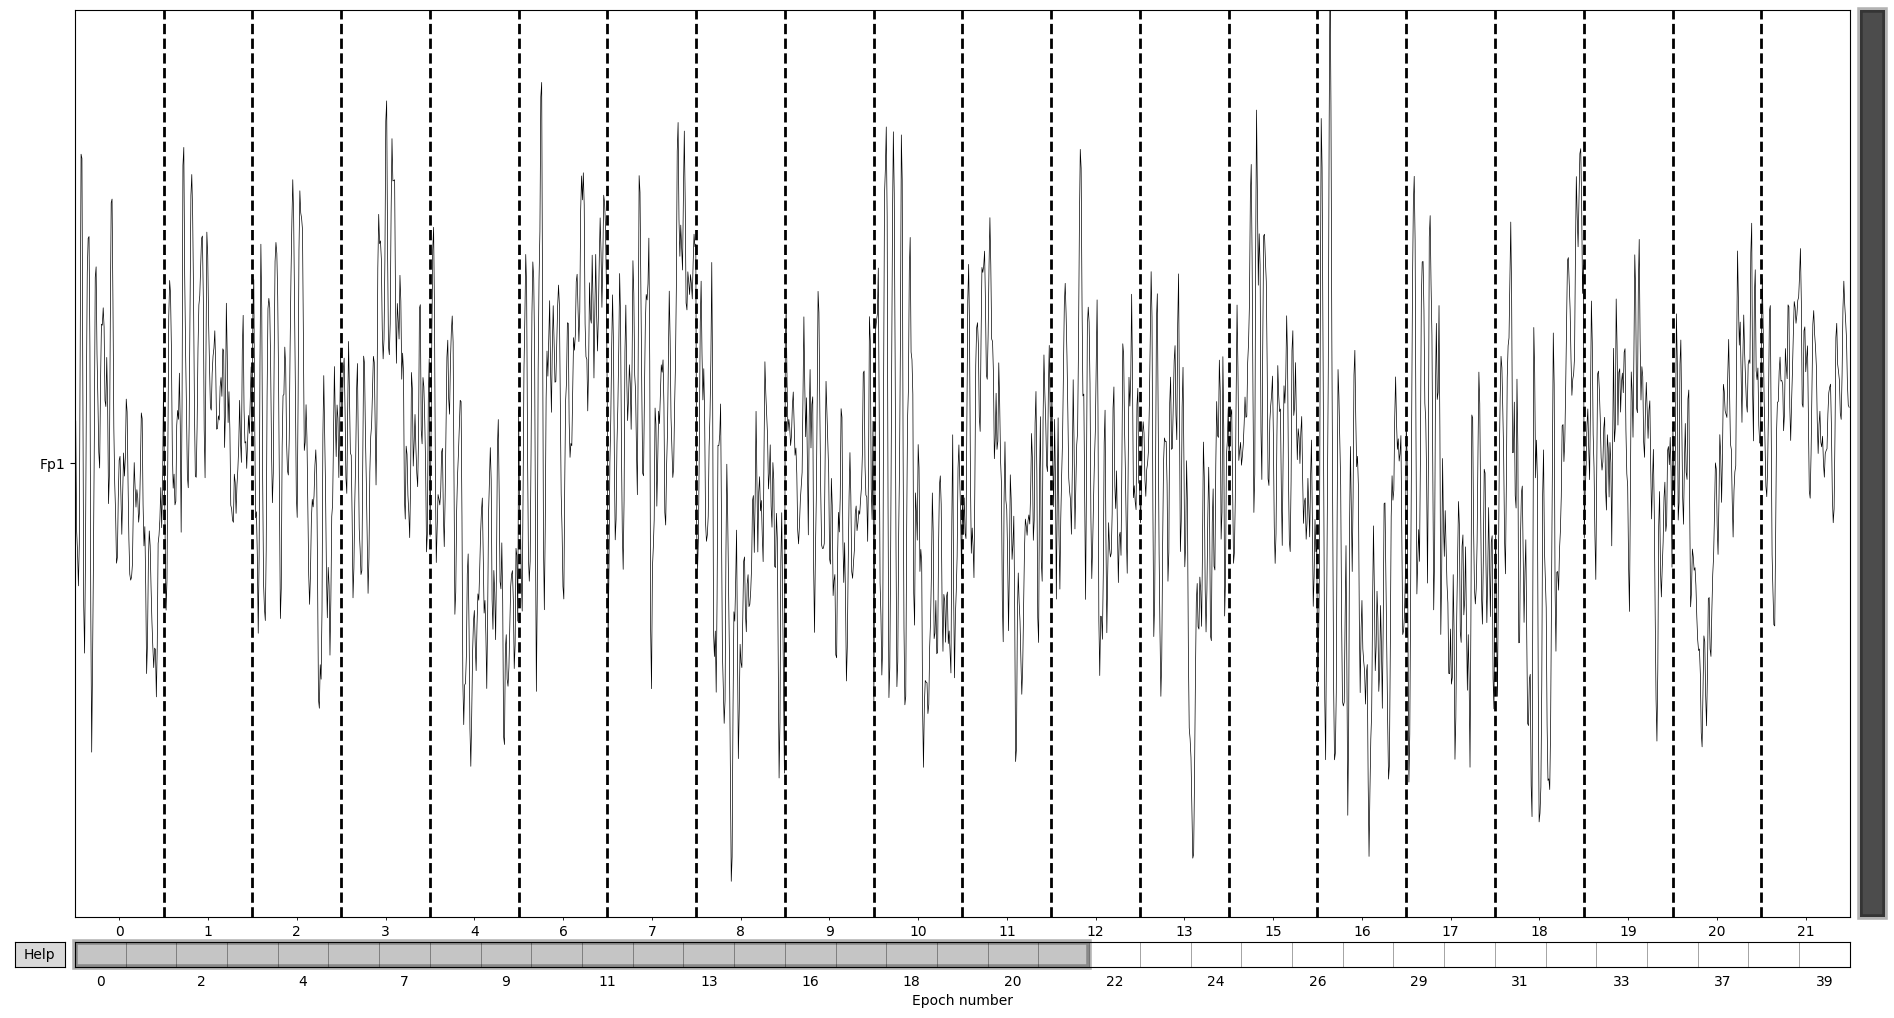

In [20]:
epochs_Fp1.plot()


In [34]:
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch

f, ax = plt.subplots()
psds, freqs = psd_multitaper(epochs, fmin=2, fmax=40)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
